In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
image_dir = r'D:\FracAtlas_extracted\FracAtlas\images\Fractured'
annotation_dir = r"D:\FracAtlas_extracted\FracAtlas\Annotations\YOLO"

#get all files
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
print(f"found {len(image_files)} fractured images")


found 717 fractured images



 processing image 1: IMG0000019.jpg
image loaded in grayscale
found 1 annotations
mask created from YOLO annotation
overlay created with bounding box


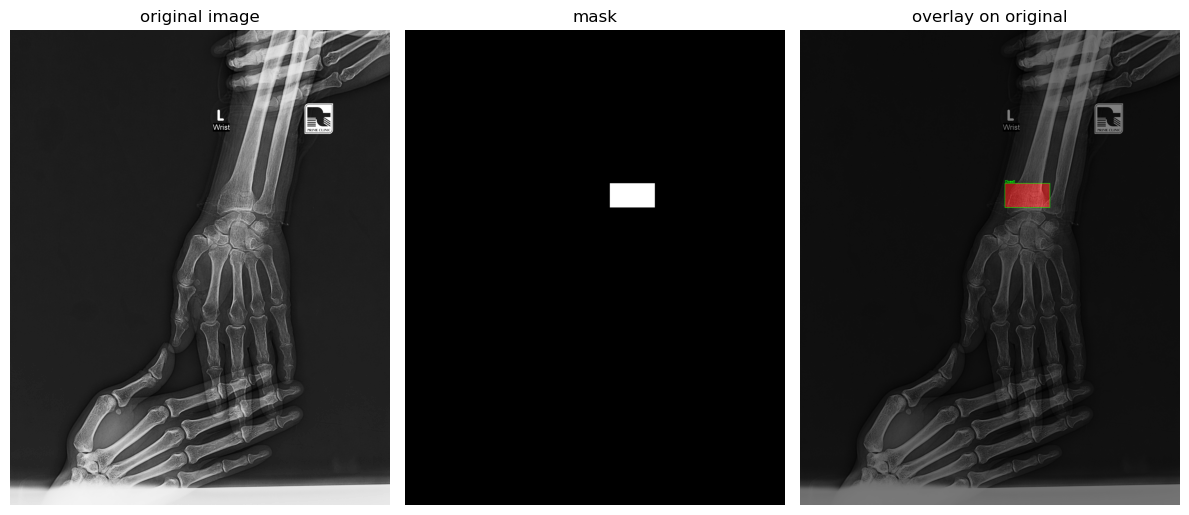


 processing image 2: IMG0000025.jpg
image loaded in grayscale
found 1 annotations
mask created from YOLO annotation
overlay created with bounding box


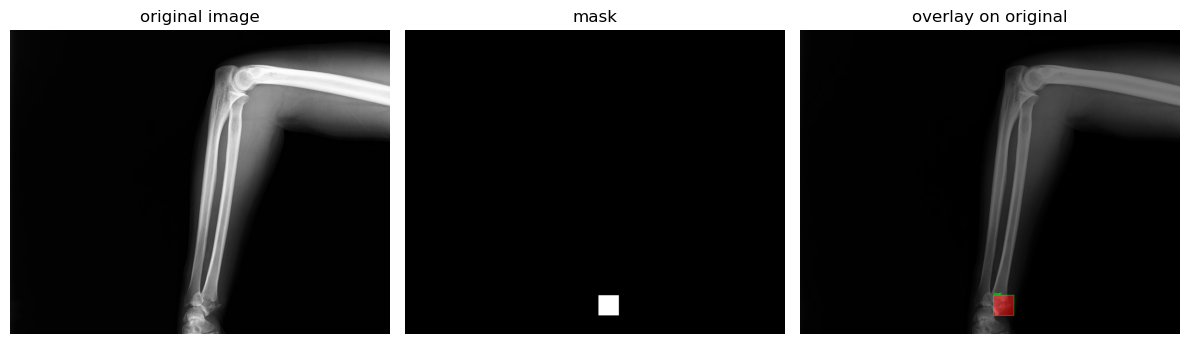


 processing image 3: IMG0000044.jpg
image loaded in grayscale
found 1 annotations
mask created from YOLO annotation
overlay created with bounding box


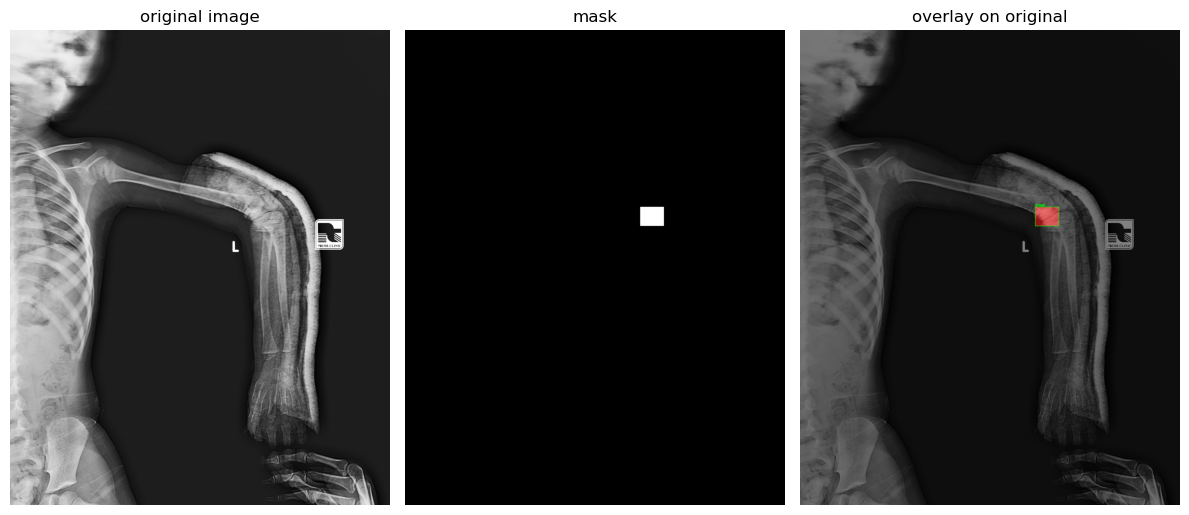


 processing image 4: IMG0000057.jpg
image loaded in grayscale
found 1 annotations
mask created from YOLO annotation
overlay created with bounding box


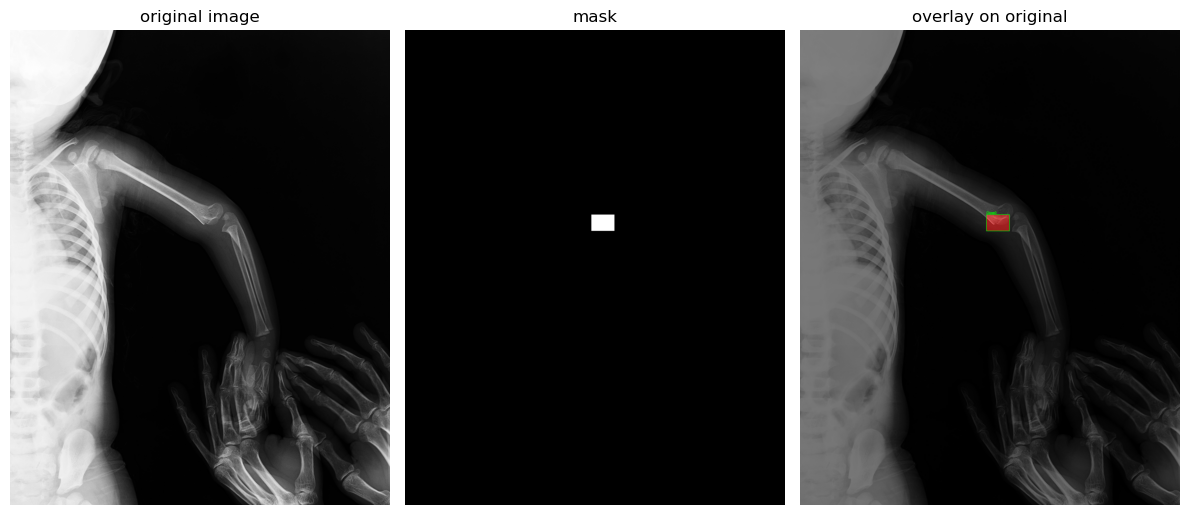


 processing image 5: IMG0000058.jpg
image loaded in grayscale
found 1 annotations
mask created from YOLO annotation
overlay created with bounding box


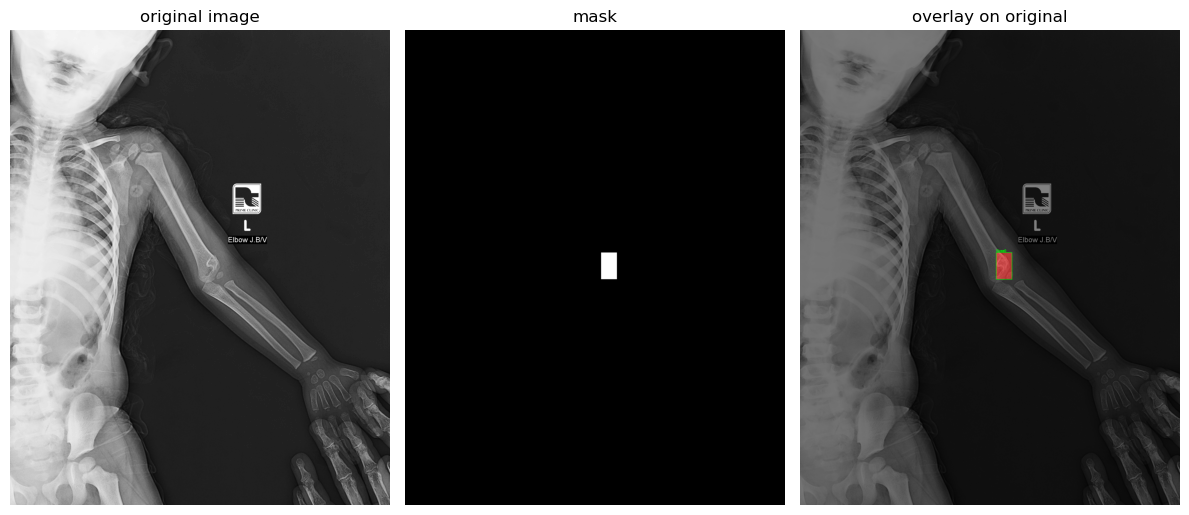

In [8]:
for idx, image_file in enumerate(image_files[:5]):
    print(f'\n processing image {idx+1}: {image_file}')
    
    #image path
    image_path = os.path.join(image_dir, image_file)
    img_gray= cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if img_gray is None:
        print("could not load image:", image_file)
        continue
    
    original_gray = img_gray.copy()
    height, width = original_gray.shape
    print("image loaded in grayscale")
    
       
    txt_file = os.path.splitext(image_file)[0] + '.txt'
    txt_path = os.path.join(annotation_dir, txt_file)
    
    if not os.path.exists(txt_path):
        print("No annotation found for:", image_file)
        continue
    
    with open(txt_path, 'r') as f:
        yolo_annotations = f.readlines()
        
    print(f"found {len(yolo_annotations)} annotations")
    
    #create empty mask
    mask = np.zeros((height, width), dtype = np.uint8)
    
    #process each annotation
    for ann in yolo_annotations:
        parts = ann.strip().split()
        class_id = int(parts[0])
        x_center ,y_center, w, h = map(float, parts[1:])
        
        #convert YOLO format to pixel values
        
        x_center *= width
        y_center *= height
        w *= width
        h *= height
        
        xmin = int(x_center - w/2)
        xmax = int(x_center + w/2)
        ymin = int(y_center - h/2)
        ymax = int(y_center + h/2)
        
        #fill mask
        mask[ymin: ymax, xmin: xmax] = 1
        
    print("mask created from YOLO annotation")
    
    
    # create colored overlay
    image_rgb = cv2.cvtColor(original_gray, cv2.COLOR_GRAY2RGB)
    colored_mask = np.zeros_like(image_rgb)
    colored_mask[mask == 1] = [255, 0, 0]
    alpha = 0.5
    
    overlay = cv2.addWeighted(image_rgb, 1 - alpha, colored_mask, alpha, 0)
    
    #bounding box
    for ann in yolo_annotations:
        parts = ann.strip().split()
        class_id = int(parts[0])
        x_center, y_center, w, h = map(float, parts[1:])
        x_center *= width
        y_center *= height
        
        w *= width
        h *= height
        
        xmin = int(x_center -w/2)
        xmax = int(x_center + w/2)
        ymin = int(y_center - h/2)
        ymax = int(y_center + h/2)
        
        cv2.rectangle(overlay, (xmin, ymin), (xmax, ymax), (0,255,0), 2)
        cv2.putText(overlay, f'Class{class_id}', (xmin, ymin - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255, 0), 2)
        
    print("overlay created with bounding box")
    
    plt.figure(figsize=(12,6))
    plt.subplot(1,3,1)
    plt.imshow(original_gray, cmap = 'gray')
    plt.title("original image")
    plt.axis('off') 
    
    plt.subplot(1,3,2)
    plt.imshow(mask, cmap = 'gray')
    plt.title('mask')
    plt.axis('off')
    
    plt.subplot(1,3,3)
    plt.imshow(overlay)
    plt.title('overlay on original')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()                   
    
    
        
    